In [20]:
pip install torch torchvision

In [21]:
import torch
import torch.nn as nn
import torch.nn. functional as F
# to load all neural net functionality # adds some efficiency
from torch.utils.data import DataLoader # Lets us Load data in batches from torchvision import datasets, transforms
from torchvision import datasets, transforms
import sklearn
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline
import time
torch.manual_seed (101) # for consistent results

In [22]:

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [23]:
# Download and load the EMNIST dataset (Balanced split)
emnist_train = torchvision.datasets.EMNIST(
    root='/content/drive/MyDrive/Data',
    split='balanced',
    train=True,
    download=True,
    transform=transform
)

emnist_test = torchvision.datasets.EMNIST(
    root='/content/drive/MyDrive/Data',
    split='balanced',
    train=False,
    download=True,
    transform=transform
)


In [24]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(
    emnist_train,
    batch_size=64,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    emnist_test,
    batch_size=64,
    shuffle=False
)

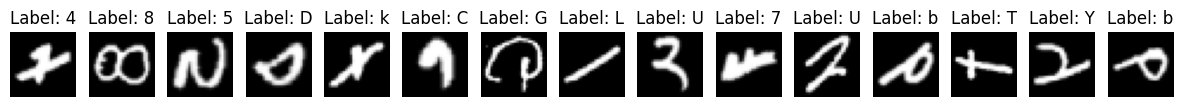

In [25]:
# Define the class labels for EMNIST dataset
class_labels = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

# Function to display images from the dataset
def display_images(images, labels, num_images=15):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Label: {class_labels[labels[i]]}")
        ax.axis('off')
    plt.show()

# Display some sample images from the training dataset
sample_images, sample_labels = next(iter(train_loader))
display_images(sample_images, sample_labels)

In [29]:
import torch.nn as nn # Import the necessary module for neural network building
import torch.optim as optim # Import the optimization module

#MLP model class
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 47)  # 47 classes for the balanced split

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Create the model instance
model = MLP()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)